# Lab 6 - Classifiers Boosting Algorithms

In this lab, we will implement the AdaBoost algorithm as an ensemble learning technique which
aims to combine a number of weak classifiers to yield a strong classifier at the end.
The idea of this lab is to identify whether a tumor with given characteristics is malignant or
benign. This is a two-class classification problem.

## Dataset and Features

You will be working on the dataset from *Hastie et al,* for breast tumor classification with 10 features representing the tumor's:

                              1. Area            6. Texture
                              2. Perimeter       7. Symmetry
                              3. Radius          8. Greyscale Level
                              4. Compactness     9. Fractal Dimension
                              5. Concavity      10. Coastline Approximation.
There is one output variable which is diagnosis. It takes one of two values `+1` for malignant and `-1` for benign.

### Question 1:
Why it is sometimes better to have the two class values `+1` and `-1` instead of `+1`
and `0`?\
**HINT :** Think about the voting scheme at the end of the boosting algorithm. How can the class values
affect this scheme?

In [1]:
'''
    Your answer:  
    in the boosting algorithm we tring to predict the value for each point several times (number of iterations) and sum all this
    predictions using there wights (alpha) and the summition will be number between -1~+1 , so we could easly check the sign of the number
    if the sign is negative -> then this point is closer to class -1 more than +1
    if the sign is positive -> then this point is closer to class +1 more than -1
    This is the best performance than check if the number is greater than .5 or less , in case of using classe 0 and 1
'''

'\n    Your answer:  \n    in the boosting algorithm we tring to predict the value for each point several times (number of iterations) and sum all this\n    predictions using there wights (alpha) and the summition will be number between -1~+1 , so we could easly check the sign of the number\n    if the sign is negative -> then this point is closer to class -1 more than +1\n    if the sign is positive -> then this point is closer to class +1 more than -1\n    This is the best performance than check if the number is greater than .5 or less , in case of using classe 0 and 1\n'

## Requirement
You are required to fill the function `adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf).`\
This function takes as parameters:

| | |
|:---|:-|
| **Y_train**| The target values for the training set |
| **X_train**| The input features for the training set.|
| **Y_test**| The target values for the test set.|
| **Y_train**| The input features for the training set.|
| **T**| The number of iterations of the AdaBoost Algorithm.|
| **clf**| The classifier to be used. (In our case, we are using a decision tree stump as a base classifier). You can use any other classifier.|

This function should return two values:
- The accuracy of the model on the training set.
- The accuracy of the model on the test set.


#### Fair Note:
In the explanation video, we assumed that (T) is the number of models you want to fit. However, this is not always the case. You may have a model base (like here we have decision trees) and you are allowed to use as many of it as you can. So (T) here becomes the number of iterations where your goal is to enhance the performance with as few iterations as possible. 

Do not get confused:
- If your case is you have T models only, we set T = number of models to fit.
- If you are allowed to use as many models as you can (as many decision trees as you need), then T is the number of iterations to choose. In such case, T becomes a parameter controlled by the programmer.

In [2]:
## imports ##
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
from utils import *
import utils

**NOTE** we prepared some utility functions to help you throughout the lab. please go and check the file *utils.py* and make sure you understand each function and know how to use it.

### TODO: AdaBoost Implementation

AdaBoost is an iterative algorithm that gives weights for the best classifier every iteration, updates weights of the data points, then repeats until convergence.

The steps of the algorithm are:

1. Initialize weights of the training examples:

$$w_{m} = \frac {1}{M}, m = 1,2,...M$$

                                        M: number of training examples. 

2. For t=1 to $T$:

    a) Select a classifier $h_{t}$ that best fits to the training data using weights $w_{m}$ of the training examples.

    b) Compute error of $h_{t}$ as:
$$err_{t} = \frac {\Sigma_{m=1}^{M} w_{m} \phi (c_{m} \neq h_{t}(x_{m}))}{\Sigma_{m=1}^{M} w_{m}}$$

    c) Compute weight of classifier:
$$\alpha_{t} = \log (\frac {1-err_{t}}{err_{t}} )$$

    d) Update weights of wrongly classified examples:
$$w_{m} = w_{m} * \exp^{\alpha_{t} \phi (c_{m} \neq h_{t}(x_{m}))}, \space m = 1 ... M$$

    e) Renormalize weights $w_{m}$


\
3. Output: $C(x)= argmax_{k}\space (\space \Sigma_{t=1}^{T} \alpha_{t} * \phi (h_{t}(x) = k)) \space)$

**Where** in step 2.B and 2.D, the $\phi (y)$ function is called the *miss indicator* function that gives values:

                                     1: if y is True
                                     0: if y is False

In [3]:
def adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf):
    #TODO: FILL THE FUNCTION with the implementation as the steps above
    
    # TODO [1]: Initialize weights
    w = None
    M=Y_train.shape[0]
    N=X_train.shape[1]
    w= [1/M]*M
    ## TODO [2]:  Initialize the training and test data with empty array placeholders
    #### Hint: what should be their shape?
    pred_train = np.empty((T,Y_train.shape[0])) ## predicted classes of the training examples
    pred_test = np.empty((T,Y_test.shape[0]))  ## predicted classes of the test examples

    ## TODO [3]: loop over the boosting iterations 
    for i in range(T): 

        # TODO [4]: Fit a classifier with the specific weights 
        ## TODO [4.A]: fit the classifier on the training data
        #### Hint: search how sklearn.tree.DecisionTreeClassifier fits classifier on data
        ### Hint: search for parameter weights in the fit matrix
        clf.fit(X_train,Y_train,sample_weight = w)
        # TODO [4.B]: predict classes for the training data and test data
        pred_train_i = clf.predict(X_train) 
        pred_test_i = clf.predict(X_test)         
        # TODO [5]: calculate the miss Indicator function
        miss_Indicator_func=np.zeros(Y_train.shape[0])
        index=0
        for y in Y_train:
            x=int(pred_train_i[index])
            if  x!=y :
                miss_Indicator_func[index] =  1
            index+=1
        # TODO [6]: calculate the error for the current classifier (err_t)
        err_t = np.dot(miss_Indicator_func,w) /  sum(w)
        
        # TODO [7]: calculate current classifier weight (Alpha_t)
        alpha_t =  0.5 * np.log( (1 - err_t) / float(err_t))
        
        # TODO [8]: update the weights 
        w = w*np.exp(alpha_t*miss_Indicator_func)
        total = sum(w)
        w = [j/total for j in w]

        # TODO [9] Add to the overall predictions
        pred_train[i] = alpha_t*pred_train_i
        pred_test[i] = alpha_t*pred_test_i
    
    predict_train = np.sum(pred_train,axis=0)
    predict_test = np.sum(pred_test,axis=0)
    # TODO [10]: Return error rate in train and test set
    #### Hint: use function get_accuracy from utils.py
    train_error = get_accuracy(np.sign(predict_train),Y_train)
    test_error = get_accuracy(np.sign(predict_test),Y_test)
    return train_error, test_error

### Testing the Boosted Classifier

Now we will use the function you implemented to build a classifer.\
You will not change code here, only read the code below and run it to see how **AdaBoost** enhanced the performance.

Reading Data ...
Number of Iterations :  10
Number of Iterations :  60
Number of Iterations :  110
Number of Iterations :  160
Number of Iterations :  210
Number of Iterations :  260
Number of Iterations :  310
Number of Iterations :  360


C:\Users\ahmed\NN_labs\Lab 6 - AdaBoost Classifier\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(range(0, 450, 50))


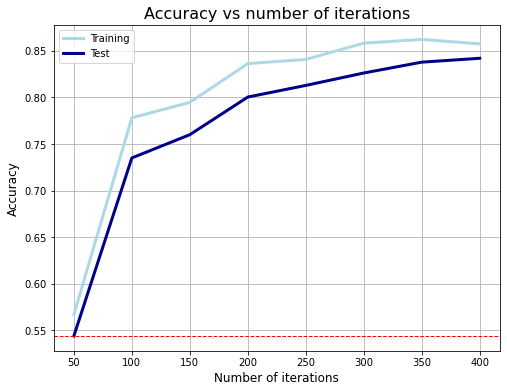

In [4]:
#### DO NOT CHANGE CODE ####

## First, read the dataset
x,y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
print('Reading Data ...')

# Split into training and test set
train, test = train_test_split(df, test_size=0.2) # this function shuffles the data points, and splits the data into
                                                  # 80% training set and 20% test set (indicated by test_size=0.2)


X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)
# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
acc_train, acc_test = [],[]
x_range = range(10, 410, 50)
for i in x_range:
    print('Number of Iterations : ' , i)
    acc_i = adaboost_classifier(Y_train, X_train, Y_test, X_test, i, clf_tree)
    acc_train.append(acc_i[0])
    acc_test.append(acc_i[1])

# Compare error rate vs number of iterations
utils.plot_accuracy(acc_train, acc_test)

### Question 2:
Justify why the plot is the way it is (is it increasing or decreasing? why? when does it flattens out?)

In [5]:
'''
    Your answer:
    it is increasing due to at each new iteration the algrithm tring to solve the mistakes at the previous stage by increasing its weight exponentailly
    so at each iteration the mistakes will decrease and the accuracy will increase
'''

'\n    Your answer:\n    it is increasing due to at each new iteration the algrithm tring to solve the mistakes at the previous stage by increasing its weight exponentailly\n    so at each iteration the mistakes will decrease and the accuracy will increase\n'

### Question 3

The number of iterations (T) is what we call a hyper parameter:
   - Its value differs from model to model and from problem to problem.
   - Its value is not learnt by time, it is set by the programmer.
   
Suggest ways to select the optimal T keeping in mind that:
   - If T is too big, the training time is large (you loop for T times, each time takes a model to fit and this model might take hours to fit)
   - If T is too small, the boosting might not reach the best values it can get.
   
   

**HINT**: Look at the graph of number of iterations vs performance and search for elbow method. Try to understand it and explain what it does.\
**HINT**: There are other hyper-parameter selection techniques, search for them as well.

In [6]:
'''
    Your answer:
    there is a lot of methods to choose the optimal T (number of terations):
        1. Cross-validation: In this approach, we split the data into training and validation sets. We train the model with different values of T on the training set and evaluate its performance on the validation set.
        We choose the value of T that gives us the best performance on the validation set.

        2. Early stopping: we monitor the performance of the model on a validation set during training.
        We stop training when we see that the performance on the validation set is not improving anymore.

        3. Grid search: we define a range of values for T and train models with each value in that range.
        We evaluate their performance and choose the value of T that gives us the best performance.(like we done in this lab)
        
        4. Random search: the same of 3 but using random values for T and choose the best performance
        ---------------------------------------------------------------------------------------------------
        there is other hyper-parameter than the number of iterations :
        Base estimator : wich include the decision tree
         Sampling method: use diffrent samplling method to choose the data set using in the training the model
'''

'\n    Your answer:\n    there is a lot of methods to choose the optimal T (number of terations):\n        1. Cross-validation: In this approach, we split the data into training and validation sets. We train the model with different values of T on the training set and evaluate its performance on the validation set.\n        We choose the value of T that gives us the best performance on the validation set.\n\n        2. Early stopping: we monitor the performance of the model on a validation set during training.\n        We stop training when we see that the performance on the validation set is not improving anymore.\n\n        3. Grid search: we define a range of values for T and train models with each value in that range.\n        We evaluate their performance and choose the value of T that gives us the best performance.(like we done in this lab)\n        \n        4. Random search: the same of 3 but using random values for T and choose the best performance\n        -------------------